# Compare

In [1]:
import sys,os
import numpy as np
import pandas as pd
import pylab as py
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib.font_manager import FontProperties
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
font0=FontProperties()
font0.set_family('sans-serif')
font0.set_style('italic')
font0.set_variant('normal')

## Load

In [2]:
pol={}

pol['NNPDF Q=1.087']=np.loadtxt("results/NNPDFpol11_NLO_Q=1.087.dat",skiprows=2)
pol['NNPDF Q=3.162']=np.loadtxt("results/NNPDFpol11_NLO_Q=3.162.dat",skiprows=2)

pol['model0 initial']=np.loadtxt("results/model0_initial.dat",skiprows=2)
pol['model0 Q=3.162']=np.loadtxt("results/model0_Q=3.162.dat",skiprows=2)

pol['model0 Q0=0.5']=np.loadtxt("results/model0_Q0=0.5.dat",skiprows=2)
pol['model0 Q0=0.53']=np.loadtxt("results/model0_Q0=0.53.dat",skiprows=2)
pol['model0 Q0=0.55']=np.loadtxt("results/model0_Q0=0.55.dat",skiprows=2)
pol['model0 Q0=0.6']=np.loadtxt("results/model0_Q0=0.6.dat",skiprows=2)

pol['model1 initial']=np.loadtxt("results/model1_initial.dat",skiprows=2)
pol['model2 initial']=np.loadtxt("results/model2_initial.dat",skiprows=2)
pol['model3 initial']=np.loadtxt("results/model3_initial.dat",skiprows=2)
pol['model4 initial']=np.loadtxt("results/model4_initial.dat",skiprows=2)





## Compare

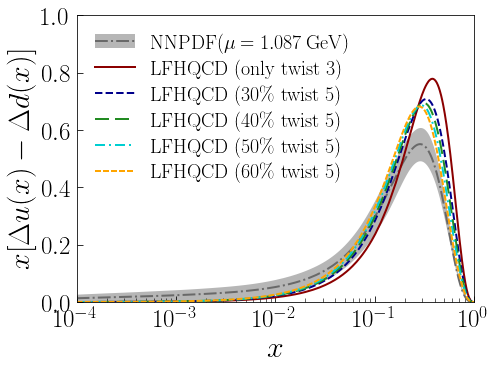

In [11]:
nrows,ncols=1,1
py.figure(figsize=(ncols*7,nrows*7*0.75))

ax=py.subplot(nrows,ncols,1)
#NNPDF
c1=ax.plot(pol['NNPDF Q=1.087'][:,0], pol['NNPDF Q=1.087'][:,3] ,color='dimgray',ls='-.', linewidth=2)
c2=ax.fill_between(pol['NNPDF Q=1.087'][:,0],\
                   pol['NNPDF Q=1.087'][:,3] - pol['NNPDF Q=1.087'][:,4],\
                   pol['NNPDF Q=1.087'][:,3] + pol['NNPDF Q=1.087'][:,4],\
                   color='darkgray', alpha=0.85, linewidth=0)
#model0
t0=ax.plot(pol['model0 initial'][:,0], pol['model0 initial'][:,2] * 1.272, color='darkred', ls='-', linewidth=2)
t1=ax.plot(pol['model1 initial'][:,0], pol['model1 initial'][:,2] * 1.272, color='darkblue', ls='--', linewidth=2)
t2=ax.plot(pol['model2 initial'][:,0], pol['model2 initial'][:,2] * 1.272, color='forestgreen', dashes=[7,3,7,3], linewidth=2)
t3=ax.plot(pol['model3 initial'][:,0], pol['model3 initial'][:,2] * 1.272, color='darkturquoise', dashes=[5,2,1,2], linewidth=2)
t4=ax.plot(pol['model4 initial'][:,0], pol['model4 initial'][:,2] * 1.272, color='orange', dashes=[3,1,3,1], linewidth=2)

#setting
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$x[\Delta u(x)-\Delta d(x)]$',size=30)
ax.set_xlim(1e-4,1)
ax.set_ylim(0,1)
ax.set_xscale('log')
ax.tick_params(axis='both', which='major', labelsize=25, direction='in', length=6, pad=6)
ax.tick_params(axis='both', which='minor', direction='in', length=4)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.2,0.4,0.6,0.8])
#ax.text(0.20,0.70,r'$\rm \mu_0^2 = 0.75\,GeV^2$',horizontalalignment='center',transform=ax.transAxes,size=20)
#ax.text(0.25,0.50,r'$\rm \mu = 1.087\,GeV$',horizontalalignment='center',transform=ax.transAxes,size=20)
#ax.text(0.10,0.70,r'$w(x)=x^{1-x}e^{-a(1-x)^2}$',horizontalalignment='left',transform=ax.transAxes,size=20)
L=[(c2,c1[0]), (t0[0]), (t1[0]), (t2[0]), (t3[0]), (t4[0])]
H=[r'$\rm NNPDF(\mu=1.087\,\rm GeV)$',\
   r'$\rm LFHQCD~(only~twist~3)$',\
   r'$\rm LFHQCD~(30\%~twist~5)$',\
   r'$\rm LFHQCD~(40\%~twist~5)$',\
   r'$\rm LFHQCD~(50\%~twist~5)$',\
   r'$\rm LFHQCD~(60\%~twist~5)$']
ax.legend(L, H, fontsize=20,frameon=False, labelspacing=0.3, loc='upper left')

py.tight_layout()
py.savefig('results/compare-4.pdf')

# Supplement